# Geospatial Analysis with Phython

First, load the data into the Jupyter Notebook

In [1]:
import geopandas as gpd

full_data = gpd.read_file('datos/DEC_lands/DEC_lands.shp')
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


We select the importants columns for work with them and then we use the method **value_counts** for know the number of different types of forest in the data.

In [2]:
data = full_data.loc[:,['CLASS', 'COUNTY', 'geometry']]
data['CLASS'].value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

Of this way, we can see that the biggest area of land use belongs to wild forest.
After, we select all rows that contains into the column *class* the types *wild forest* and *wilderness* and then we realize a plot for look where are these sites

<AxesSubplot:>

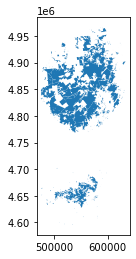

In [3]:
wild_lands = data.loc[data['CLASS'].isin(['WILD FOREST', 'WILDERNESS'])]
wild_lands.plot()

We can get the area of polygons accessing to geometry attribute and then the area attribute

In [4]:
wild_lands.geometry.area/10**6

0         2.990365
1         1.143940
2         0.948548
3         1.822293
4         0.282196
           ...    
2969      0.387248
2971    522.751846
2972      0.000958
2973      0.442990
2974      0.059955
Length: 1017, dtype: float64

We will charge too another shapefiles about campsites, foot trails and county boundaries

In [5]:
# Campsites in New York state (Points)
campsites = gpd.read_file('datos/DEC_pointsinterest/Decptsofinterest.shp')
campsites = campsites.loc[campsites['ASSET'].isin(['PRIMITIVE CAMPSITE'])]

# Foot trails
trails = gpd.read_file('datos/DEC_roadstrails/Decroadstrails.shp')
trails = trails[trails['ASSET'] == 'FOOT TRAIL']

# County boundaries
county = gpd.read_file('datos/NY_county_boundaries/NY_county_boundaries.shp')

Then, we can plot all geometry's in a unique plot.
- First, we must plot the biggest map und save it in variable **ax**
- Second, add another plots specifying in the argument **ax** the saved plot to put the new map inside of this and so on .

<AxesSubplot:>

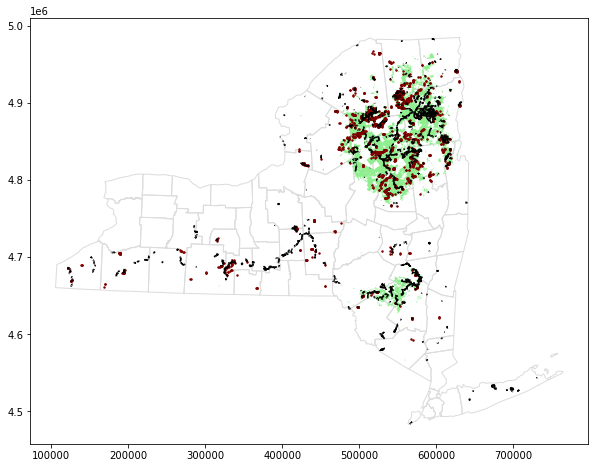

In [6]:
ax = county.plot(
    figsize = (10,10), # Set the figure size
    color = 'none',    # Set the background color in none (transparent)
    edgecolor = 'gainsboro') # Set the edge color of map

wild_lands.plot(color = 'lightgreen',
                ax = ax)

trails.plot(color = 'black',
            markersize = 1,
            ax = ax)

campsites.plot(color = 'maroon',
               markersize = 2, # Set the size of point
               ax = ax)